# CM3: Result Analysis
**Note: Important section have** <span style="color:blue">**blue**</span> **heading**

### Model Description

**Model 1**: 4 layer fully connected Neural Network (1 input layer, 2 hidden layers with relu activation function, 1 output layer).

**Model 2**: 4 layer fully connected Neural Network (1 input layer, 2 hidden layers with sigmoid activation function, 1 output layer).

**Model 3**: 6 layer fully connected Neural Network (1 input layer, 4 hidden layers with relu activation function, 1 output layer).

**Model 4**: 8 layer fully connected Neural Network (1 input layer, 4 hidden layers with relu activation function, 2 dropout layers to prevent overfitting and 1 output layer).

**Model 5**: 5 layer Simple Recurrent Neural Network (1 input layer, 1 RNN layer, 2 hidden layers and 1 output layer).

**Model 6**: 5 layer LSTM Neural Network (1 input layer, 1 LSTM layer, 2 hidden layers and 1 output layer).

## <span style="color:blue">Runtime Performance for training and testing</span>

| Model  | Training time (s) | Test time (ms) |
| --- | --- | --- |
|  Model 1  | 39.5 | 116 |
|  **Model 2**  | **25.5** | **97.8** |
|  Model 3  | 27.7 | 111 |
|  Model 4  | 31.5 | 109 |
|  Model 5  | 163 | 333 |
|  Model 6  | 559 | 825 |

*Model with the best measure is highlighted in bold*

From the table above, **Model 2** had the fastest training and testing time.
The Recurrent neural Network models (**Model 5** and **Model 6**) took a considerably longer time in both training and testing.

## <span style="color:blue">Comparison of the different models</span>

### Validation accuracy and loss

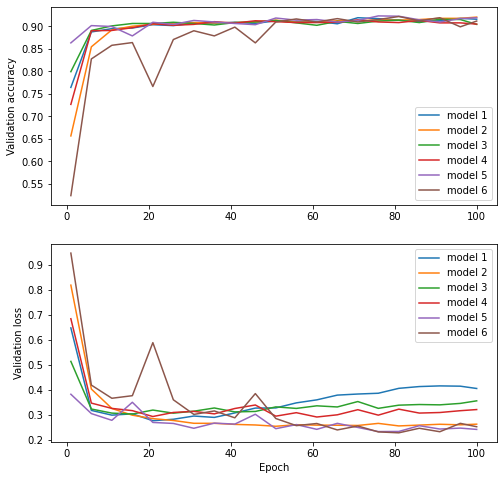

In [87]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8))
count = 1
epochs = list(range(1,100, 5))
epochs.append(100)
for history in history_list:
    label = 'model ' + str(count)
    val_accuracy = [history.history['val_accuracy'][i] for i in range(len(history.history['val_accuracy'])) if i%5 == 0]
    val_loss = [history.history['val_loss'][i] for i in range(len(history.history['val_loss'])) if i%5 == 0]
    val_accuracy.append(history.history['val_accuracy'][-1])
    val_loss.append(history.history['val_loss'][-1])
    ax1.plot(epochs, val_accuracy, label= label)
    ax2.plot(epochs, val_loss, label=label)
    count += 1
    
ax1.set_ylabel('Validation accuracy')
ax2.set_ylabel('Validation loss')
ax2.set_xlabel('Epoch')
ax1.legend()
ax2.legend()

The plots above show the performance of the different models on the validation set in terms of accuracy and loss.

From the Accuracy plot, all the models prforms comparatively equally after training for 100 epochs. **Model 6** performed relatively less compared to the other models for the first 50 epochs but after that, it improved and performed as well as the others.

Looking at the Loss plot, **model 1** had the highest loss compared to the others followed by **Model 3** and **Model 4** after 100 epochs. The loss of **model 1** and **Model 3** started to increase gradually after 20 epochs which could be an indication of overfitting which could be handled by early stopping. The Recurrent neural Network models (**Model 5** and **Model 6**) had the lowest validation loss and of the DNN models, only **Model 2** had an equally low validation loss after 100 epochs.

### <span style="color:blue">Comparing performance using training and validation accuracy and loss vs epoch plots</span>

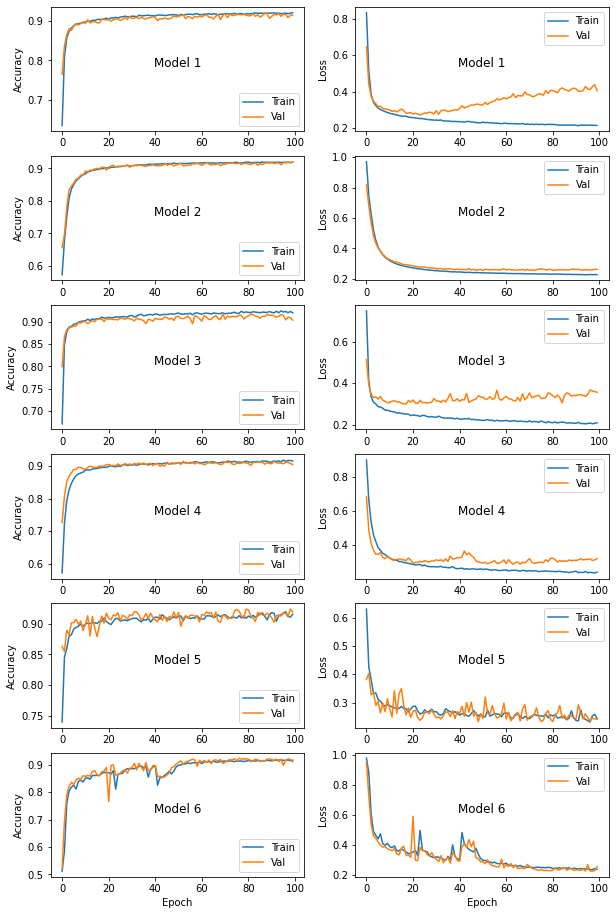

In [88]:
compare_accuracy_loss(history_list)

From the plots of training and validation accuracy and loss above the generalization error of the models can be seen as the gap between training accuracy and validation accuracy or training loss and validation loss. 

In terms of accuracy, all the models perform well and have very low generalization error i.e the difference between training accuracy and validation accuracy is very low. 

from the loss plots, **Model 3** has the highest gap between training loss and validation loss followed by **model 1**. the other models have negligible difference between training and validation loss.

It can be concluded that the fully connected DNN with Relu activation (**Model 1** and **Model 3**) had significant difference between training loss and validation loss but when drop out regularization is added as in **Model 4**, the difference becomes negligible. The fully connected DNN with Sigmoid activation (**Model 2**) and the Recurrent Neural Networks (**Model 5** and **Model 6**) had negligible difference between training loss annd validation loss.

### <span style="color:blue">Evaluating model performance with other metrics</span>

The evaluation metrics used are Accuracy, Precision, Recall and F-score. These metrics were chosen for evaluation considering the nature of the problem (Medical classification). 

- Precision decribes the proportion of positive cases correctly identified.
- Recall descripes the proportion of all positive cases that were actually detected.
- F-score is the harmonic mean of precision and recall.

**Training Set**

| Model  | Accuracy | Precision | Recall | F score |
| --- | --- | --- |--- | --- |
|  Model 1  | **92.34** | **0.92** | **0.92**| **0.92**|
|  Model 2  | 92.21 | **0.92** | **0.92**| **0.92**|
|  Model 3  | 92.18 | **0.92** | **0.92**| **0.92**|
|  Model 4  | 91.82 | **0.92** | **0.92**| **0.92**|
|  Model 5  | 91.50 | **0.92** | 0.91| 0.91|
|  Model 6  | 91.19 | 0.91 | 0.91| 0.91|


**Validation Set**

| Model  | Accuracy | Precision | Recall | F score |
| --- | --- | --- |--- | --- |
|  Model 1  | 91.58 | **0.92** | **0.92**| **0.92**|
|  Model 2  | **92.05** | **0.92** | **0.92**| **0.92**|
|  Model 3  | 90.44 | 0.90 | 0.90| 0.90|
|  Model 4  | 90.51 | 0.91 | 0.90| 0.91|
|  Model 5  | 91.92 | **0.92** | **0.92**| **0.92**|
|  Model 6  | 91.18 | 0.91 | 0.91| 0.91|


**Test Set**

| Model  | Accuracy | Precision | Recall | F score |
| --- | --- | --- |--- | --- |
|  Model 1  | 91.05 | **0.91** | **0.91**| **0.91**|
|  Model 2  | 91.25 | **0.91** | **0.91**| **0.91**|
|  Model 3  | 90.78 | **0.91** | **0.91**| **0.91**|
|  Model 4  | 90.24 | 0.90 | 0.90| 0.90|
|  Model 5  | 90.38 | 0.90 | 0.90| 0.90|
|  Model 6  | **91.45** | **0.91** | **0.91**| **0.91**|

**Accuracy**

- From the tables above, Model 1 had the highest training accuracy (92.34) followed by Model 2 (92.21) while Model 6 had the lowest training accuracy (91.19).
- Model 2 performed best on the validation set with an accuracy of 92.05 followed by Model 5 (91.92). Model 3 had the least accuracy on the validation set (90.44).
- On the test set, Model 6 performed best with an accuracy of 91.45 followed by Model 2 (91.25). Model 4 had the least accuracy compared to the other models on the test set (90.24)

**Precision**

- All the models had a precision of 0.92 except Model 6 which had a precision of 0.91 on the training set.
- On the validation set Model 1, Model 2 and Model 5 had precision of 0.92. Model 4 and Model 6 had 0.91 precision while Model 3 had 0.90 precision.
- On the test set Model 1, Model 2, Model 3 and Model 6 had precision of 0.91 while Model 4 and Model 5 had 0.90 precision.

**Recall**

- All the models had a recall of 0.92 except Model 5 and Model 6 which had a recall of 0.91 on the training set.
- On the validation set Model 1, Model 2 and Model 5 had recall of 0.92. Model 3 and Model 4 had 0.90 recall while Model 6 had 0.91 recall.
- On the test set Model 1, Model 2, Model 3 and Model 6 had recall of 0.91 while Model 4 and Model 5 had 0.90 recall.

**F-score**

- All the models had a F-score of 0.92 except Model 5 and Model 6 which had a F-score of 0.91 on the training set.
- On the validation set Model 1, Model 2 and Model 5 had F-score of 0.92. Model 4 and Model 6 had 0.91 F-score while Model 3 had 0.90 F-score.
- On the test set Model 1, Model 2, Model 3 and Model 6 had F-score of 0.91 while Model 4 and Model 5 had 0.90 F-score.

## <span style="color:blue">Conclusion</span>

Considering the overall performance using the validation training and loss plots, runtime, and the different performance metrics, **Model 2** (4 layer fully connected Neural Network - 1 input layer, 2 hidden layers with sigmoid activation function, 1 output layer) seems to be the best performing model compared to the others.